In [39]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
sns.set_style('whitegrid')

## Download NLTK Stopwords

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kunal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
 df = pd.read_csv("C:/Users/Kunal/Email_Spam_Detection/emails.csv");

In [43]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## Visualizing Class Distribution

C:\Users\Kunal\AppData\Local\Temp\ipykernel_30004\3762313346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=df, palette=['#3498db', '#e74c3c'])


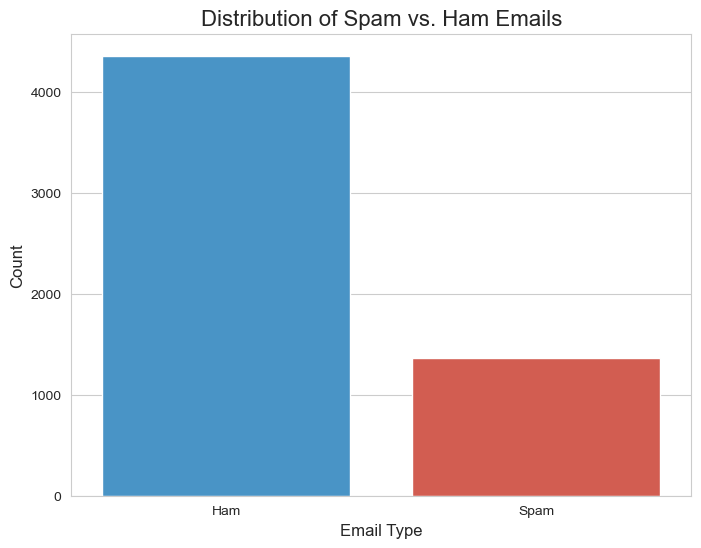

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of Spam vs. Ham Emails', fontsize=16)
plt.xlabel('Email Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# Data Cleaning and Preprocessing

In [44]:
stop_words = set(stopwords.words('english'))

In [45]:
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = text.split()
    words = [w for w in words if not w in stop_words]
    return ' '.join(words)

In [46]:
df['text'] = df['text'].apply(clean_text)

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000)

In [48]:
X = df['text']
Y = df['spam']

# Vectorization using TF-IDF

In [49]:
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [50]:
X_tfidf.shape

(5728, 3000)

# Slpiting Data into training and testing set

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_tfidf, Y, test_size=0.2, random_state=42, stratify=Y
)

# Build and train SVM Model

In [52]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

In [53]:
svm_model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

# Evaluate the model performance

In [54]:
Y_pred = svm_model.predict(X_test)

In [55]:
accuracy = accuracy_score(Y_test, Y_pred)

In [56]:
accuracy

0.9895287958115183

In [57]:
cr=classification_report(Y_test, Y_pred)

In [58]:
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       872
           1       0.98      0.98      0.98       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [59]:
cm = confusion_matrix(Y_test, Y_pred)

# Visualize the confusion matrix

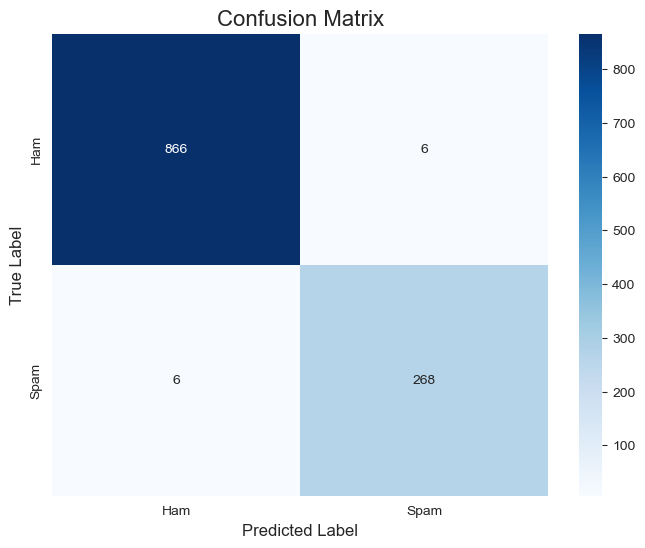

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

### Testing with new email

In [61]:
new_emails = [
    "Congratulations! You've won a $1000 Walmart gift card. Go to http://example.com to claim now.",
    "Hi team, please review the attached quarterly report and provide your feedback by Friday. Thanks.",
    "URGENT: Your account has been compromised. Click here to secure your account immediately!",
    "Don't forget about the project deadline tomorrow morning."
]


In [62]:
cleaned_new_emails = [clean_text(email) for email in new_emails]
new_emails_tfidf = tfidf_vectorizer.transform(cleaned_new_emails)
new_predictions = svm_model.predict(new_emails_tfidf)

In [63]:
for email, prediction in zip(new_emails, new_predictions):
    print(f"\nEmail: '{email}'")
    print(f"\n Prediction: {prediction}")


Email: 'Congratulations! You've won a $1000 Walmart gift card. Go to http://example.com to claim now.'

 Prediction: 1

Email: 'Hi team, please review the attached quarterly report and provide your feedback by Friday. Thanks.'

 Prediction: 0

Email: 'URGENT: Your account has been compromised. Click here to secure your account immediately!'

 Prediction: 1

Email: 'Don't forget about the project deadline tomorrow morning.'

 Prediction: 0
